In [ ]:
!pwd

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!conda install -c anaconda keras-gpu -y

In [ ]:
# !pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.9.0-cp36-cp36m-linux_x86_64.whl --no-cache-dir

In [ ]:
# !find $CONDA_PREFIX -name "tensorflow" | xargs -Ipkg rm -rfv pkg

In [ ]:
!conda install -c conda-forge tensorflow-gpu -y

In [ ]:
# !conda remove keras -y

In [ ]:
# import tensorflow as tf
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# print(sess)

In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [1]:
import keras

Using TensorFlow backend.


In [ ]:
# !conda install keras -y

In [ ]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [ ]:
# !conda install keras -y

In [ ]:
# !conda list

In [ ]:
# from keras import backend as K
# import keras 
# import tensorflow as tf
# config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU':32} ) 
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)
# K.tensorflow_backend._get_available_gpus()

In [ ]:
# sess

In [2]:
import os;
# os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
os.environ['KERAS_BACKEND'] = 'tensorflow' 

In [4]:
os.environ['KERAS_BACKEND']

'tensorflow'

In [ ]:
# !KERAS_BACKEND=tensorflow python -c "from keras import backend"

In [ ]:
import keras

In [ ]:
keras.backend.backend()

In [1]:
# /home/vision/Documents/Suraj
import zipfile
import numpy as np
import keras
# from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import PIL as PIL
import tensorflow as tf

Using TensorFlow backend.


In [3]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [4]:
# !conda install mkl-service -y

In [2]:
import glob
import os
import math
import shutil

In [3]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# config.gpu_options.allow_growth=True
config.gpu_options.per_process_gpu_memory_fraction = 0.8
sess = tf.Session(config=config)
set_session(sess)

# run_options = tf.RunOptions(report_tensor_allocations_upon_oom = False)
# sess.run(op, feed_dict=fdict, options=run_options)

# config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.allocator_type = 'BFC'
# config.gpu_options.per_process_gpu_memory_fraction = 0.9

In [4]:
!nvidia-smi

Wed Dec 11 19:41:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.87                 Driver Version: 390.87                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0  On |                  N/A |
| 44%   34C    P2    56W / 250W |   9500MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [10]:
# !kill -9 13822

In [20]:
zipfilepath = "/dataset.zip" ## Give the path of dataset folder(zip) !! Please refer the folder structure
storezippath = "/extracted/"

In [21]:
def readZipData(paths, name):
    all_files = glob.glob(paths + name +"/*")
    num_of_cls = len(all_files)
    name_of_class = []
    data_info = {}
    for f in all_files:
        name_of_class.append(f.split("/")[-1])
        all_data = glob.glob(f+"/*")
        data_info[f.split("/")[-1]] = len(all_data)
    return num_of_cls,name_of_class, data_info
    

In [22]:
def extractZip(zipfilepath, storezippath):
    zip_name = zipfilepath.split("/")[-1].split(".")[0]
    try:
        with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
            zip_ref.extractall(storezippath)
            
        numOfClass,nameOfClass, dataInClass = readZipData(storezippath, zip_name)
        return numOfClass,nameOfClass, dataInClass, zip_name
    except Exception as e:
        print(e)
        return False

In [23]:
def generateStructure(train_p, test_p, valid_p, dataInClass, storezippath, zipname):
    directory = storezippath + "/" + "SampleDataset/"
    directory_train = directory + "train/"
    directory_test = directory + "test/"
    directory_valid = directory + "valid/"
    for key, val in dataInClass.items():
        temp = [val]
        temp_train_p = train_p / 100 * val
        temp_test_p = test_p / 100 * val
        temp_valid_p = valid_p / 100 * val
        temp.append((math.floor(temp_train_p),math.floor(temp_test_p),math.floor(temp_valid_p)))
        dataInClass[key] = temp
        
    
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    if not os.path.exists(directory_train):
        os.makedirs(directory_train)
        for key,val in dataInClass.items():
            temp_name = directory_train+ "/" + key + "/"
            
            if not os.path.exists(temp_name):
                os.makedirs(temp_name)
                
            all_file = glob.glob(storezippath + "/" + zipname+"/"+ key+ "/*")
            for i in range(int(temp_train_p)):
                shutil.move(all_file[i], temp_name)
            
            
            
        
    if not os.path.exists(directory_test):
        os.makedirs(directory_test)
        for key,val in dataInClass.items():
            temp_name = directory_test+ "/" + key + "/"
            
            if not os.path.exists(temp_name):
                os.makedirs(temp_name)
                
            all_file = glob.glob(storezippath + "/" + zipname+"/"+ key+ "/*")
            for i in range(int(temp_test_p)):
                shutil.move(all_file[i], temp_name)
        
    if not os.path.exists(directory_valid):
        os.makedirs(directory_valid)
        
        for key,val in dataInClass.items():
            temp_name = directory_valid+ "/" + key + "/"
            
            if not os.path.exists(temp_name):
                os.makedirs(temp_name)
                
            all_file = glob.glob(storezippath + "/" + zipname+"/"+ key+ "/*")
            for i in range(int(temp_valid_p)):
                shutil.move(all_file[i], temp_name)
        
    
    
    
    
    

In [24]:
def plots(ims, figsize =(12,6), rows=1, interp= False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3 ):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) %2 ==0 else len(ims) // rows+1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [25]:


def plot_sample_batch(train_batches):
    imgs, label = next(train_batches)
    plots(imgs,titles= label)
    

In [26]:
def generate_model():
    print("Here")
    model = Sequential()

    model.add(Conv2D(64, (3, 3), input_shape=(224,224,3),padding="same", activation="relu"))
    model.add(Conv2D(64, (3, 3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2) ))
    model.add(Conv2D(128, (3, 3),padding="same", activation="relu"))
    model.add(Conv2D(128, (3, 3), padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(256, (3, 3),padding="same", activation="relu"))
    model.add(Conv2D(256, (3, 3), padding="same",activation="relu"))
    model.add(Conv2D(256, (3, 3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
    model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
    model.add(Conv2D(512, (3, 3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(512, (3, 3),padding="same", activation="relu"))
    model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
    model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(2, activation="sigmoid"))
    return model

In [49]:
def generate_summary(model):
    print(model.summary())

In [28]:
def compile_fit_model(model, train_batches):
    model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit_generator(train_batches, steps_per_epoch=50, validation_data=valid_batches, validation_steps=30,
                   epochs=10, verbose=1
                   )
    return model
    

In [29]:
# get_prediction_on_test(model, test_batches)

In [30]:
classes = ["Cat", "Dog"]
def get_prediction_on_test(model,test_bat):
    img, label = next(test_bat)
    pre = model.predict(img,steps=1, verbose=0)
    for loop in range(img.shape[0]):
        i = np.array(img[loop]).astype(np.uint8)
        plt.figure()
        p = np.argmax(pre[loop])
        plt.imshow(i)
    #     print(test_batches[3])
        if p == 1:
            plt.title("Predicted Label: Dog, Actual label: {}".format(classes[np.argmax(label[loop])]))
        else:
            plt.title("Predicted Label: Cat, Actual label: {}".format(classes[np.argmax(label[loop])]))


In [31]:
# def perform_data_augmentation(train_batches):
    
#     gen = ImageDataGenerator(rotation_range=10000, width_shift_range=0.1,height_shift_range=0.1,
#                         shear_range=0.15, zoom_range=0.1, channel_shift_range=10000, horizontal_flip=True
#                         )
    
#     aug_iter = gen.flow_from_directory(train_path, target_size = (224,224))
    
#     return aug_iter

In [50]:
numOfClass,nameOfClass, dataInClass, zipname = extractZip(zipfilepath, storezippath)
print("Number of Classes: ", numOfClass)
print("Name of Classes: ", nameOfClass)
print("Data of classes: ", dataInClass)

##
# train test valid %
train_percentage = 80
test_percentage = 10
valid_percentage = 10

if os.path.exists(storezippath +"SampleDataset/"):
    shutil.rmtree(storezippath +"SampleDataset/")

generateStructure(train_percentage, test_percentage, valid_percentage, dataInClass, storezippath, zipname)
print("Folder Structure Generated !!\n")

train_path = storezippath + "/SampleDataset/train"
test_path = storezippath + "/SampleDataset/test"
valid_path = storezippath + "/SampleDataset/valid"

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),  batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),  batch_size=8)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),  batch_size=10)


print("\nSample Batch --")
# plot_sample_batch(valid_batches)
# input_shape = (None, None, 3)


# model = generate_model()

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(224,224,3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2) ))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Conv2D(128, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(Conv2D(256, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
model.add(Conv2D(512, (3, 3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(512, (3, 3),padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(2, activation="softmax"))

generate_summary(model)

model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


# model.fit_generator(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=5,
#                epochs=10000, verbose=1
#                )


Number of Classes:  2
Name of Classes:  ['Cat', 'Dog']
Data of classes:  {'Cat': 12500, 'Dog': 12500}
Folder Structure Generated !!

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.

Sample Batch --
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 108, 108, 128)     73856   

In [6]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")

In [44]:
from keras.models import model_from_json

In [45]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [46]:
loaded_model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


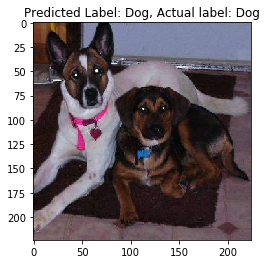

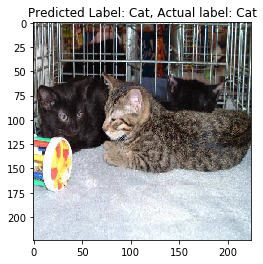

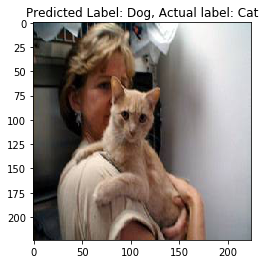

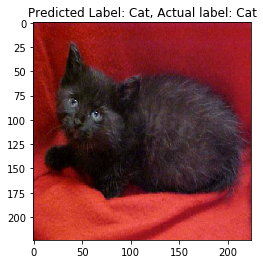

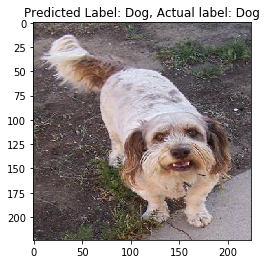

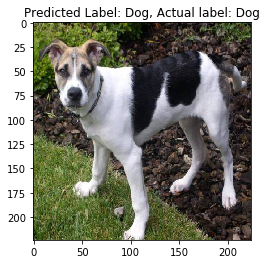

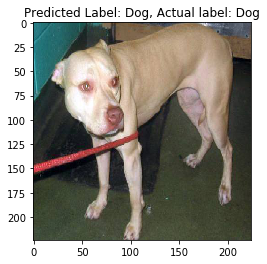

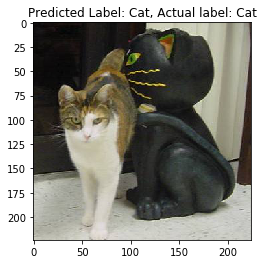

In [48]:
get_prediction_on_test(loaded_model, test_batches)